# Preparing Text Data with Python

### Overview

The dataset used for this activity contains tweet data along with a score (0-4, 4 means highest positive sentiment) for sentiment expressed. 

We would need to clean the raw text of the tweets to remove the extraneous symbols and words to de-clutter the text. The whole idea is to remove anything that does not contribute (are mere distractions or noise) much to the sentiments expressed. That will make is easier for machine to learn the sentiment expressed. We will follow these steps to prepare the tweet text for analysis: 

- Remove punctuation symbols and numerals, leaving only alphabetic characters.
- Convert all remaining characters to lower case. 
- Plot bar chart showing individual word frequency, order by the highest to lowest frequency.


### Load and transform the tweet data

As a first step, load the tweet dataset **tweets.csv** to a dataframe and set the column names to convenient values.

In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# load tweets.csv into a dataframe and rename columns
dataset = pd.read_csv('tweets.csv')
dataset.rename(columns= {'sentiment_label': 'sentiment',
                            'tweet_text': 'tweets'}, inplace=True)
dataset.head()

,sentiment,tweets
0,4,"@elephantbird Hey dear, Happy Friday to You A..."
1,4,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...


Examine the head of the data frame shown above, noticing the content of the two columns.
- The Sentiment column contains a sentiment score {0,4} for negative of positive sentiment of the tweet.
- The Tweets column contains the actual text of the tweet.


## Normalize the text

You will now normalize the tweet text. The steps involved are:
- Remove numbers.
- Remove punctuation.
- Convert to lower case.

In [2]:
# import string library to bring in a string of punctuation characters
import string
punct_chars = string.punctuation
print(type(punct_chars))
print (punct_chars) # check out the punctuation characters in the string, these will be used as filter

<class 'str'>
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [3]:
tweets = dataset['tweets'].tolist()

# remove numbers
tweets = list(map(lambda x: ''.join(["" if char.isdigit() else char for char in x]), tweets))

# remove punctuation chars
tweets = list(map(lambda x: ''.join(["" if char in punct_chars else char for char in x]), tweets))

# convert to lower case
tweets = list(map(str.lower, tweets))
tweets[:5]

['elephantbird hey dear happy friday to you  already had your rices bowl for lunch ',
 'ughhh layin downnnn    waiting for zeina to cook breakfast',
 'greeniebach i reckon hell play even if hes not but i know nothing  it wont be the same without him',
 'valewee i know  saw it on the news',
 'very sad that httpwwwfabchannelcom has closed down one of the few web services that ive used for over  years']

Examine the tweet text. All of the characters are lower case and there are no punctuation characters, or numbers. 

Next, you will compute the counts and frequencies of the words in the tweets. The **nltk** package contains two tools to help:
* The ** regexp_tokenize** functuon tokenizes the text. Tokenization is the process of dividing the text into its component tokens. In this case, the tokens are all words, since you are working with normalized text.
* The ** FreqDist** function computes the frequency distribution of words in a text corpus. A Pandas data frame is then computed from the word frequency array. 

In [4]:
def word_frequency(tweets):
    import nltk
    '''
    function to calculate the frequency of word occurence in a corpus
    args: tweets - a list of strings
    returns: dataframe with index as word and a column 'Count'. Lists the words sorted in descending order by count
    '''
    tweets = list(map(lambda x: nltk.regexp_tokenize(x, r'\S+'), tweets)) # word tokens as list of lists
    
    tweets = [w for l in tweets for w in l] # convert list of lists to a single list

    ## Compute the frequency distribution of the words as a dictionary
    fdist = nltk.FreqDist(tweets) 
    
    ## Convert the dictionary to a dataframe contaning the words and
    ## counts indexed by the words, and then take the transpose.
    count_frame = pd.DataFrame(fdist, index =[0]).T
    count_frame.columns = ['Count']
    return(count_frame.sort_values('Count', ascending = False))
 
wf = word_frequency(tweets)
wf.head(20)

,Count
i,74980
to,56329
the,51708
a,37950
my,31680
and,30083
you,26978
is,23724
it,23179
for,21696


wf dataframe lists the 20 top words ordered by the term frequency. Of these 20 most frequent words none are likely to convey much information on sentiment.  

Create a bar plot of word frequency for the most common 50 words. 

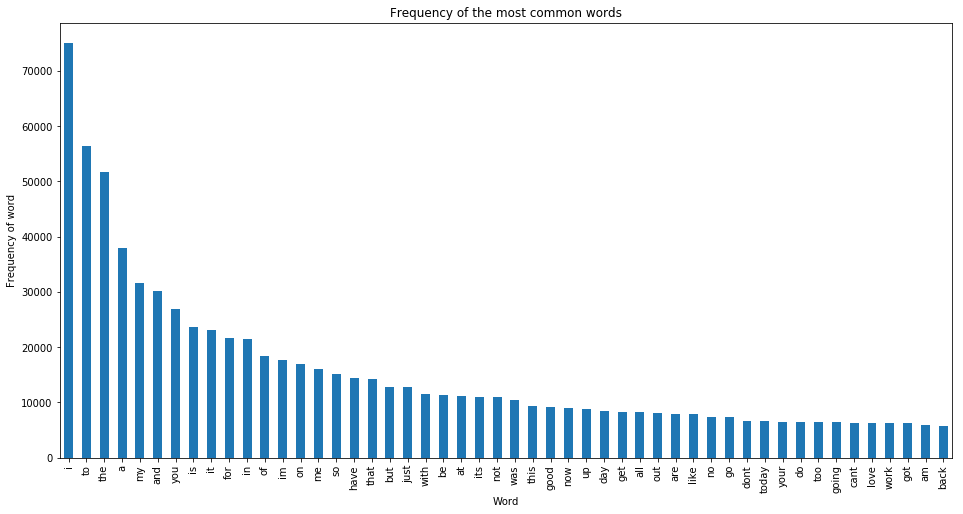

'Plotting Done'

In [26]:
def bar_plot(df):
    '''
    function to make bar chart of top 50 words
    args: dataframe with word as index and column "Count"
    returns: Bar Plot
    '''
    ## Barplot of the most fequent words.   
    fig = plt.figure(figsize=(16, 8))
    ax = fig.gca()    
    df['Count'][:50].plot(kind = 'bar', ax = ax)
    ax.set_title('Frequency of the most common words')
    ax.set_ylabel('Frequency of word')
    ax.set_xlabel('Word')
    plt.show()
    return 'Plotting Done'
bar_plot(wf)

Lets plot the cumulative distribution frequency (CDF) plot.

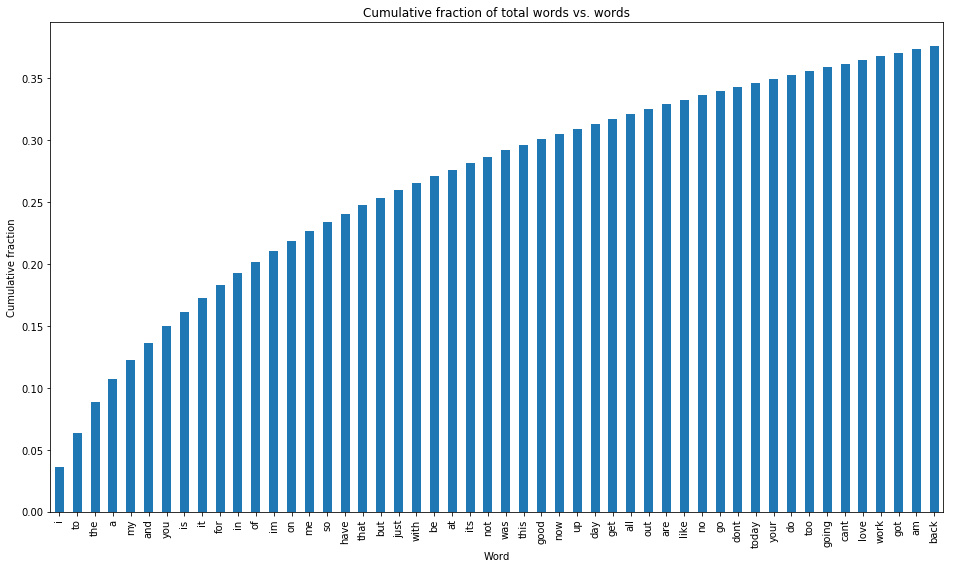

'Plotting Done'

In [29]:
def cumfr_plot(df):

    # Compute the relative cumulative frequency of the words in descending order of frequency and add the dataframe.   
    word_count = float(df['Count'].sum(axis = 0))   
    df['Cum'] = df['Count'].cumsum(axis = 0)
    df['Cum'] = df['Cum'].divide(word_count)
    
    # Barplot the cumulative frequency for the most frequent words.   
    fig = plt.figure(figsize=(16, 9))
    ax = fig.gca()    
    df['Cum'][:50].plot(kind = 'bar', ax = ax)
    ax.set_title('Cumulative fraction of total words vs. words')
    ax.set_ylabel('Cumulative fraction')
    ax.set_xlabel('Word')
    plt.show()
    return 'Plotting Done'

cumfr_plot(wf)

Upon examining the plots, we will se that the most frequently occuring words are stop words, such as "i", "to", the", "a", "my", "and", which are not likely to be helpful in determining sentiment. Also, the frequency of the words drops off fairly quickly. Thus it can be concluded that for the dataset, the most frequent words are stop words and the frequency of words drops off rather quickly. Also notice, that the frequency of the words becomes uniform fairly quickly. 

# Student / Partner Activity #3
****

## Remove Stop Words
* The words which do not contribute a lot to the sentiments expressed are known as stop words. These words have to be removed from the normalized text for further analysis. We have an extensive list of such stop words in `stopwords.csv` 

In [7]:
# load the stop words dataset and view first five elements
stop_words = pd.read_csv('stopwords.csv')
stop_words.head()

,words
0,a
1,about
2,above
3,actual
4,after


In [8]:
# Lets form a list of unique stop words
stop_word_unique = stop_words['words'].unique().tolist()
stop_word_unique[:20]

['a',
 'about',
 'above',
 'actual',
 'after',
 'again',
 'against',
 'all',
 'alreadi',
 'also',
 'alway',
 'am',
 'amp',
 'an',
 'and',
 'ani',
 'anoth',
 'any',
 'anyth',
 'are']

Filter out the Stop Words

In [21]:
tokenized=[]; word_filt=[]
for tweet in tweets:
    tokenized.append(tweet.split())

tweets_filtered = list(map(lambda x: (' ').join(word for word in x if word not in stop_word_unique), tokenized))
tweets_filtered[:20]

['elephantbird dear happy already rices bowl',
 'ughhh layin downnnn waiting zeina cook breakfast',
 'greeniebach reckon hell hes nothing wont without',
 'valewee news',
 'sad httpwwwfabchannelcom closed web services ive used years',
 'fearnecotton sings remember alwaysss radio catch artist',
 'god ur side anything possible',
 'lovesmrs stupid',
 'delved guts expression engine flexible cms dev great clients',
 'emoskank awww',
 'vh better tube',
 'ran champagne wonder brother convince bring bottle',
 'carolinefjones wish going',
 'homeworkthen bedwaking awful',
 'ashleyltmsyf ashley hush hush hush hush',
 'scratch enjoy seein people left college came makes chuckle',
 'demisuperfan good sorry took long reply chillin listening music wbu',
 'lydiajohn good morning youre early chilling chomping far training',
 'joni omggg lol trending topic released hehe',
 'danielak quotgood morningquot next seriously marvelous']

In [22]:
# Calculating word frequency
df_filtered = word_frequency(tweets_filtered) #using the function created earlier

In [25]:
# View the top words after stopwords removal
df_filtered.head(20)

,Count
good,9133
like,7796
go,7320
going,6407
love,6269
lol,5517
really,4888
well,4474
thanks,3927
oh,3843


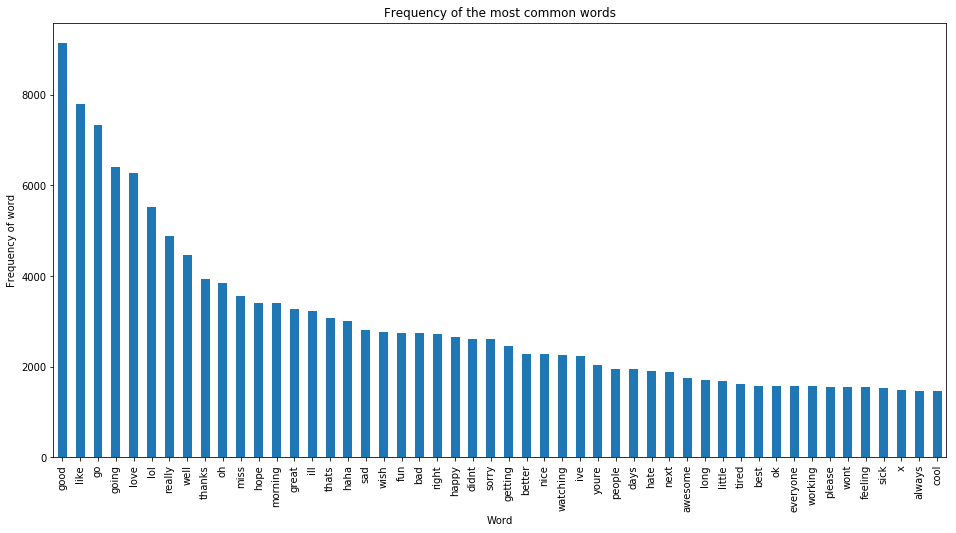

'Plotting Done'

In [27]:
# create bar chart using bar_plot function
bar_plot(df_filtered)

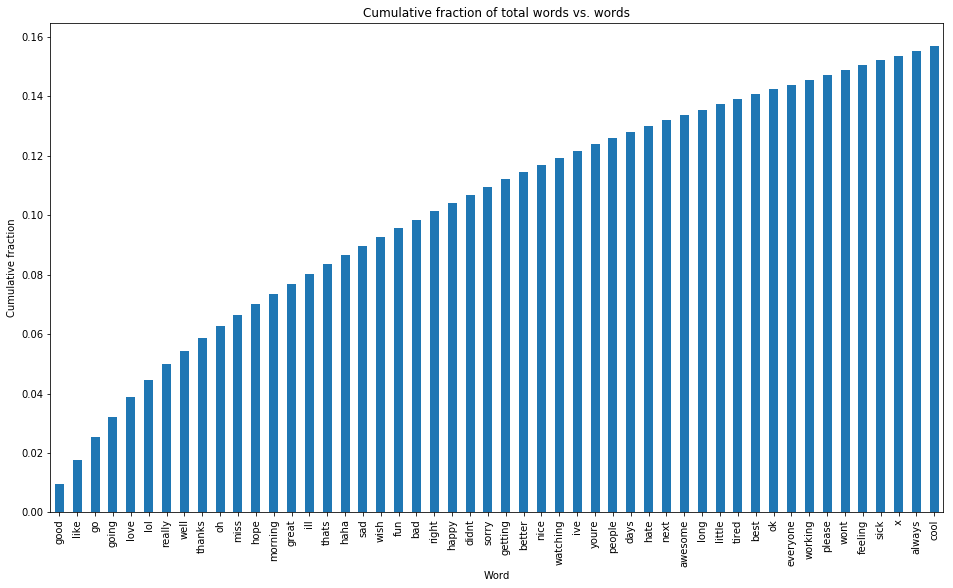

'Plotting Done'

In [30]:
# Create Cumulative Frequency
cumfr_plot(df_filtered)